# XGBoost


In this notebook, we will learn how to use **XGBoost** (Extreme Gradient Boosting) for a simple Machine Learning task.  
XGBoost is a very powerful and popular algorithm, especially for structured/tabular data.


In [1]:

# Import necessary libraries
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Step 1: Load a Sample Dataset

In [2]:

# Load breast cancer dataset (classification problem)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Shape of dataset:", X.shape)
X.head()


Shape of dataset: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Step 2: Split the Data into Training and Testing

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (455, 30)
Testing set size: (114, 30)


### Step 3: Train XGBoost Model

In [4]:

# Initialize and train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


### Step 4: Make Predictions

In [5]:

# Predict on test data
y_pred = model.predict(X_test)
print("Predictions:", y_pred[:10])


Predictions: [1 0 0 1 1 0 0 0 0 1]


### Step 5: Evaluate the Model

In [6]:

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.956140350877193
Confusion Matrix:
 [[40  3]
 [ 2 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Step 6: Feature Importance

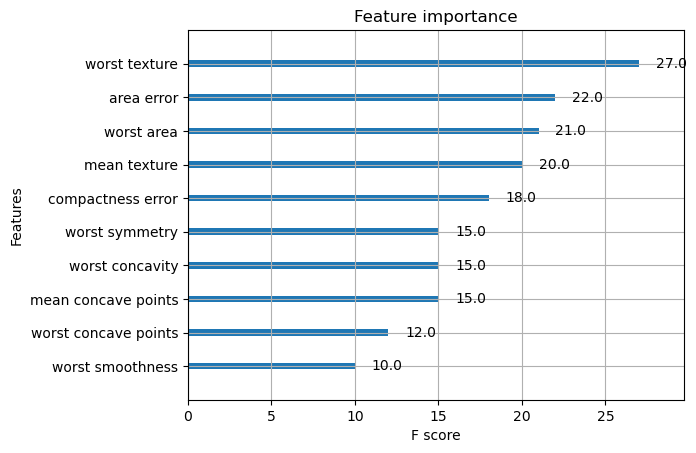

In [7]:

import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(model, max_num_features=10, importance_type='weight')
plt.show()
